In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import statsmodels.formula.api as sm
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## reading in data for MTA Washington DC ridership 

In [67]:
ridWC = pd.read_csv("https://data.maryland.gov/api/views/ub96-xxqw/rows.csv?accessType=DOWNLOAD")

In [68]:
ridWC.head()

,Month,Bus,Metro,Light Rail,Mobility,Taxi Access,MARC Total,MARC - Brunswick,MARC - Camden,MARC - Penn,Commuter Bus Total,CB - Baltimore,CB - Washington,CB - ICC,Total Average Weekday Ridership
0,Jul-06,205015,43358,22997,2838,1072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,275280
1,Aug-06,215455,44427,22708,2860,1162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,286612
2,Sep-06,251719,44062,24085,2985,1211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,324062
3,Oct-06,251749,45510,22773,3055,1184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,324271
4,Nov-06,247152,43469,22846,2997,1192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,317656


In [69]:
ridWC.tail()

,Month,Bus,Metro,Light Rail,Mobility,Taxi Access,MARC Total,MARC - Brunswick,MARC - Camden,MARC - Penn,Commuter Bus Total,CB - Baltimore,CB - Washington,CB - ICC,Total Average Weekday Ridership
127,Feb-17,223160,37428,20202,5911,1898,32709.0,7084.0,4110.0,21515.0,16061.0,1181.0,14049.0,832.0,317167
128,Mar-17,214454,34319,22669,6551,2413,32669.0,6824.0,4186.0,21659.0,15741.0,1174.0,13725.0,843.0,306147
129,Apr-17,216823,36558,23613,6088,2184,35163.0,7114.0,4575.0,23475.0,15431.0,1114.0,13422.0,895.0,275689
130,May-17,228239,36684,20547,6934,2234,35737.0,7333.0,4896.0,23508.0,15596.0,1139.0,13567.0,890.0,345970
131,Jun-17,226701,39484,23981,6700,22858,36448.0,7497.0,4684.0,24267.0,15447.0,1110.0,13450.0,887.0,351046


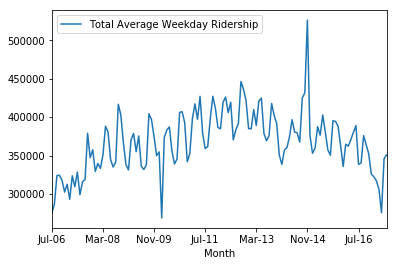

Figure 1. Total ridership on Washington DC MTA July06-Junw2017, monthly cadence


In [70]:
ridWC.plot(x="Month", y="Total Average Weekday Ridership")
pl.show()
print("Figure 1. Total ridership on Washington DC MTA July06-Junw2017, monthly cadence")

# Q1
Find the most prominent event in the total ridership. Note: there are 2 prominent events (3-sigma outliers) in the “Total ridership” column reported in the data file, but only 1 of them appears in the time series generated by summing each individual mode of transportation*. That is the event of interest. Identify it**, identify the date, and, through an internet search answer: what was the cause of the largest anomaly in Maryland ridership 2006-2016?

In [71]:
ridWC.Month[ridWC["Total Average Weekday Ridership"] == 
           ridWC["Total Average Weekday Ridership"].min()]

43    Feb-10
Name: Month, dtype: object

A google search for 
    "Washington DC February 2010 events"
    
returns [the following](https://en.wikipedia.org/wiki/February_5%E2%80%936,_2010_North_American_blizzard) as the second result:

    February 5–6, 2010 North American blizzard

    From Wikipedia, the free encyclopedia

    The February 5–6, 2010 North American blizzard, commonly referred to as Snowmageddon,[1] was a paralyzing and crippling blizzard that had major and widespread impact in the Northeastern United States. The storm's center tracked from Baja California Sur on February 2nd, 2010 to the East coast on February 6, 2010, before heading east out into the Atlantic. Effects were felt to the north and west of this track in northern Mexico, California, and the Southwestern, Midwestern, Southeastern, and most notably Mid-Atlantic States. Severe weather, including extensive flooding and landslides in Mexico, and historic snowfall totals in every one of the Mid-Atlantic states, brought deaths to Mexico, New Mexico, Virginia, Pennsylvania and Maryland.[2]



we interpret the first most significant event (drop in ridership) as the consequence of Snowmageddon

# Q2
Find the most prominent period in the time “Total ridership” time series.



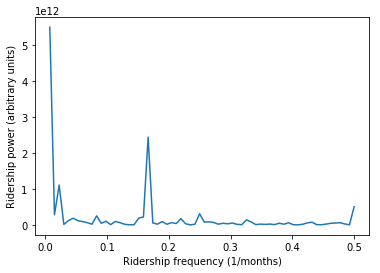

Figure 2: power spectrum of ridership: the power spectrum reveals the periodicity of Washington DC ridership:
Maximum periodicity: 6.0 months


In [72]:
ridPower = np.abs(np.fft.rfft(ridWC["Total Average Weekday Ridership"])**2)

time_step = 1 

freqs = np.fft.rfftfreq(len(ridWC), time_step)

plt.plot(freqs[1:], ridPower[1:])
pl.ylabel("Ridership power (arbitrary units)")
pl.xlabel("Ridership frequency (1/months)");
pl.show()
print ("Figure 2: power spectrum of ridership: " + 
       "the power spectrum reveals the periodicity of Washington DC ridership:")
print ("Maximum periodicity: %.1f months"%(
        1.0 / freqs[2:][ridPower[2:] == ridPower[2:].max()]))

# Q3
Find the mode of transportation that increased in popularity, and the mode of transportation that decreased in popularity the most

In [73]:
ridWC.describe()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,Bus,Metro,Light Rail,Mobility,Taxi Access,MARC Total,MARC - Brunswick,MARC - Camden,MARC - Penn,Commuter Bus Total,CB - Baltimore,CB - Washington,CB - ICC,Total Average Weekday Ridership
count,132.000000,132.000000,132.000000,132.000000,132.000000,120.000000,120.000000,120.000000,120.000000,78.000000,78.000000,78.000000,76.000000,132.000000
mean,249869.522727,45635.795455,25467.439394,4945.121212,1488.795455,33864.475000,7375.433333,4369.125000,22116.158333,16038.179487,1321.794872,14107.153846,625.236842,367755.409091
std,22914.043613,5022.637236,3167.085742,1278.421152,1913.814116,2499.516847,491.341496,388.030614,2072.194688,1513.384740,152.356073,1497.680155,267.948247,39304.657042
min,174809.000000,29987.000000,18198.000000,2783.000000,579.000000,28360.000000,5766.000000,3133.000000,18104.000000,12040.000000,994.000000,10353.000000,23.000000,268857.000000
25%,232325.000000,43320.250000,23315.000000,3809.750000,985.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,340129.750000
50%,248375.500000,46256.000000,25423.000000,5071.500000,1284.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,370462.500000
75%,266294.250000,49245.750000,27798.000000,6134.000000,1672.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,391942.000000
max,300618.000000,55839.000000,36519.000000,6934.000000,22858.000000,38946.000000,8316.000000,5358.000000,26567.000000,20071.000000,1727.000000,18263.000000,988.000000,526095.000000


removing modes of tranportation that are not complete

In [74]:
ridWCcut = ridWC[["Month", "Bus","Metro","Light Rail","Mobility","Taxi Access","MARC Total"]]

In [75]:
ridWCcut.head()

,Month,Bus,Metro,Light Rail,Mobility,Taxi Access,MARC Total
0,Jul-06,205015,43358,22997,2838,1072,NaN
1,Aug-06,215455,44427,22708,2860,1162,NaN
2,Sep-06,251719,44062,24085,2985,1211,NaN
3,Oct-06,251749,45510,22773,3055,1184,NaN
4,Nov-06,247152,43469,22846,2997,1192,NaN


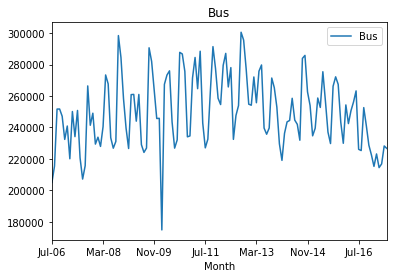

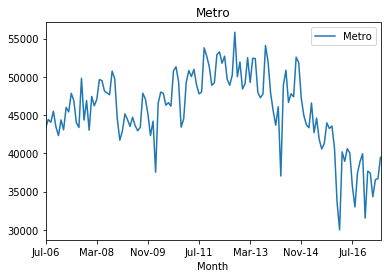

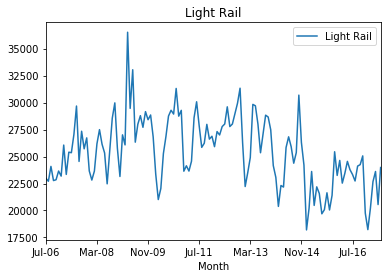

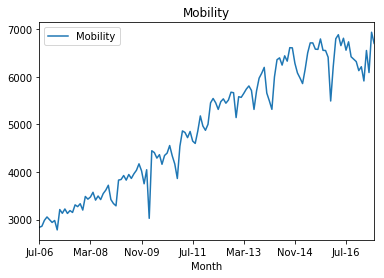

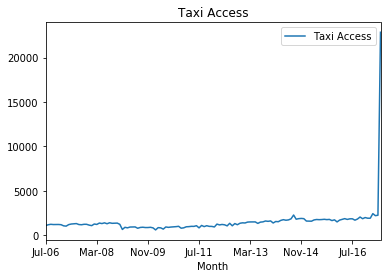

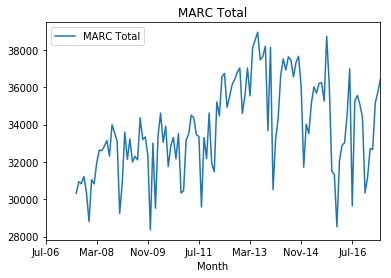

Figure 3: time series by each mode of transportation with complete date between July 2006 and June 2016


In [76]:
for c in ridWCcut.columns:
    if c == "Month": continue
    ax = pl.figure().add_subplot(111)
    ridWCcut.plot(x="Month", y=c, ax=ax)
    ax.set_title(c)
pl.show()
print ("Figure 3: time series by each mode of transportation " + 
       "with complete date between July 2006 and June 2016")

easy answer: take last half minus first half means (using only first and lastt quarter)

In [77]:
N = len(ridWCcut)
Non4 = int(N * 0.25)
for c in ridWCcut.columns:
    if c == "Month": continue
    print (c, ridWCcut[c][Non4:].mean() / ridWCcut[c][:-Non4].mean())


Bus 1.00245209755
Metro 0.959814661402
Light Rail 0.962767798114
Mobility 1.23512992804
Taxi Access 1.3634225838
MARC Total 1.01677845367


*Mobility* is not a clear mode of transportation. **Taxi** appears to have the fastest ridership, **Metro** appears to decrease the most.

Checking with a linear fit to confirm

In [78]:
ridWCcut["muteindex"] = np.arange(len(ridWCcut))
ridWCcut.head()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Month,Bus,Metro,Light Rail,Mobility,Taxi Access,MARC Total,muteindex
0,Jul-06,205015,43358,22997,2838,1072,NaN,0
1,Aug-06,215455,44427,22708,2860,1162,NaN,1
2,Sep-06,251719,44062,24085,2985,1211,NaN,2
3,Oct-06,251749,45510,22773,3055,1184,NaN,3
4,Nov-06,247152,43469,22846,2997,1192,NaN,4


In [79]:
ridWCcut.rename(columns = {"Light Rail":"LightRail",
                        "Taxi Access":"TaxiAccess",
                        "MARC Total":"MARCTotal"}, inplace=True)

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [80]:
ridWCcut.mean(axis=0)

Bus           249869.522727
Metro          45635.795455
LightRail      25467.439394
Mobility        4945.121212
TaxiAccess      1488.795455
MARCTotal      33864.475000
muteindex         65.500000
dtype: float64

In [81]:
ridWCnorm = ridWCcut.copy()
ridWCnorm = (ridWCnorm[:-1] - ridWCnorm[:-1].mean(axis=0) ) / ridWCnorm[:-1].std(axis=0)
ridWCnorm["muteindex"] = np.arange(len(ridWCcut) - 1)
ridWCnorm.describe()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/ops.py:995: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1 but corresponding boolean dimension is 131
  yrav = yrav[mask]
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,Bus,LightRail,MARCTotal,Metro,Mobility,TaxiAccess,muteindex
count,1.310000e+02,1.310000e+02,1.190000e+02,1.310000e+02,1.310000e+02,1.310000e+02,131.000000
mean,2.983195e-16,-5.695190e-16,1.373318e-15,6.373189e-16,-5.423990e-17,-2.169596e-16,65.000000
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,37.960506
min,-3.283842e+00,-2.292043e+00,-2.194249e+00,-3.131170e+00,-1.686604e+00,-1.918918e+00,0.000000
25%,-7.689574e-01,-6.881009e-01,NaN,-4.652653e-01,-8.957849e-01,-8.767985e-01,32.500000
50%,-4.169899e-02,-1.126577e-02,NaN,1.217386e-01,5.437606e-02,-1.276545e-01,65.000000
75%,7.115291e-01,7.367158e-01,NaN,7.127322e-01,9.232964e-01,8.669208e-01,97.500000
max,2.207270e+00,3.475537e+00,2.042358e+00,2.026085e+00,1.571651e+00,2.794392e+00,130.000000


Bus ~ muteindex
Metro ~ muteindex
LightRail ~ muteindex
Mobility ~ muteindex
TaxiAccess ~ muteindex
MARCTotal ~ muteindex


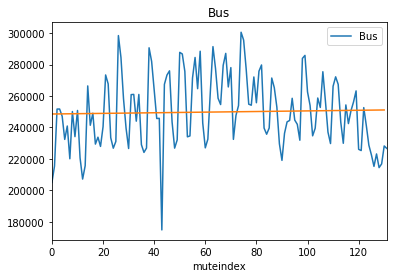

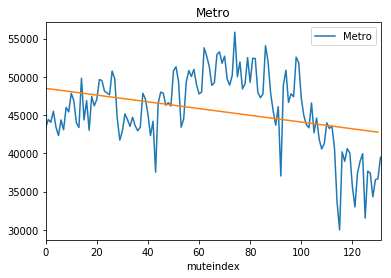

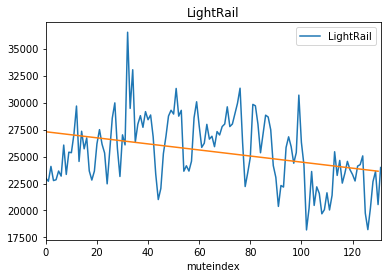

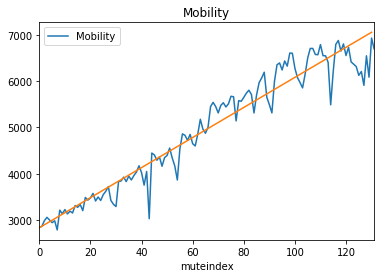

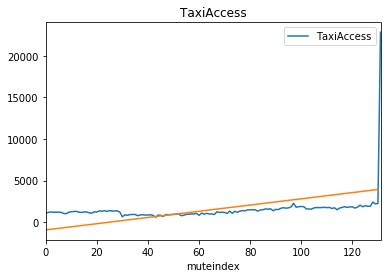

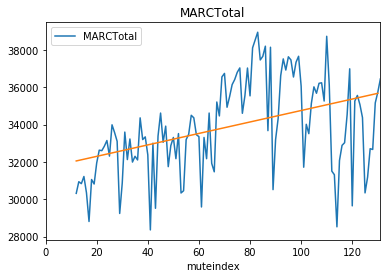

Figure 4: same as figure 3 with overplotted linear models


In [82]:
coeffs = {}
for c in ridWCcut.columns:
    if c == "Month" or c=="muteindex": continue
    print ("%s ~ muteindex"%c)
    model = sm.ols(formula="%s ~ muteindex"%c, data=ridWCnorm).fit()
    ax = pl.figure().add_subplot(111)
    ridWCcut.plot(x="muteindex", y=c, ax=ax)
    ax.set_title(c) 
    ax.plot(ridWCnorm.muteindex[-len(model.fittedvalues):],
           model.fittedvalues * ridWCcut[c].std(axis=0) + ridWCcut[c].mean(axis=0))
    coeffs[c] = model.params
pl.show()
print ("Figure 4: same as figure 3 with overplotted linear models")

In [83]:
for c in ridWCcut.columns:
    if c == "Month" or c=="muteindex": continue
    print (c, coeffs[c]["muteindex"])

Bus 0.000862923922476
Metro -0.00877669987737
LightRail -0.00888387905963
Mobility 0.0254553185478
TaxiAccess 0.0195741575895
MARCTotal 0.0122795826837


the mode of transportation with the most significant increase in ridership is Taxi, however the last datapoint is suspicious. 

**MARC** appears to have the most significant constant increase
**Metro and Long Rail** appear to decrease ridership at the same rate

# Q4
Predict the average ridership in 2020 by a simple (polynomial OLS) model.



In [101]:
ridWC["total"] = ridWC["Total Average Weekday Ridership"]
ridWC["muteindex"] = np.arange(len(ridWC))
model = sm.ols(formula="total ~ muteindex", data=ridWC).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     11.21
Date:                Thu, 16 Nov 2017   Prob (F-statistic):            0.00107
Time:                        20:17:08   Log-Likelihood:                -1577.8
No. Observations:                 132   AIC:                             3160.
Df Residuals:                     130   BIC:                             3165.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   3.488e+05   6552.831     53.228      0.000      3.36e+05  3.62e+05
muteindex    289.5139     86.475      3.348      0.001       118.433   460.595
==============================================================================
Omnibus:                        6.098   Durbin-Watson:                   0.748
Prob(Omnibus):                  0.047   Jarque-Bera (JB):                8.394
Skew:                           0.197   Prob(JB):                       0.0150
Kurtosis:                       4.171   Cond. No.                         151.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
ridWC[["Month","muteindex"]][-3:]

,Month,muteindex
129,Apr-17,129
130,May-17,130
131,Jun-17,131


since this is a linear model the average ridership in 2020 is the ridership half way through the month: average of June and July. I will look for the index of Jun July 2020 if the DF continued till then

In [112]:
pd.date_range(start="2006-07-01", periods=131 + 12 * (2020 - 2017) + 2, freq='m')

DatetimeIndex(['2006-07-31', '2006-08-31', '2006-09-30', '2006-10-31',
               '2006-11-30', '2006-12-31', '2007-01-31', '2007-02-28',
               '2007-03-31', '2007-04-30',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=169, freq='M')

In [115]:
print ("Predicted 2020 average ridership:", 
       model.predict({"muteindex": np.array([1, 2]) + 131 + 12 * (2020 - 2017) }).mean())

Predicted 2020 average ridership: 397575.344297
